In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('data/integrated Asma Data_basedOnAdmission.csv')
df.head()

,num_sequencial,sexo,idade,dicofre,distrito,concelho,freguesia,regiao,nacionalidade,data_admissao,...,moonphase,conditions,description,icon,stations,pm25,pm10,o3,no2,so2
0,372731,1,35,111009,LISBOA,OEIRAS,PORTO SALVO,LISBOA E VALE DO TEJO,PORTUGAL,2019-01-01,...,0.91,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,D7126,08536099999,LPPT...",0.0,19.0,12.0,22.0,1.0
1,945004,1,11,111012,LISBOA,OEIRAS,ALGÉS,LISBOA E VALE DO TEJO,BRASIL,2019-01-01,...,0.91,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,D7126,08536099999,LPPT...",0.0,19.0,12.0,22.0,1.0
2,1156492,1,5,111012,LISBOA,OEIRAS,ALGÉS,LISBOA E VALE DO TEJO,PORTUGAL,2019-01-01,...,0.91,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,D7126,08536099999,LPPT...",0.0,19.0,12.0,22.0,1.0
3,1156493,2,45,110658,LISBOA,LISBOA,BELÉM,LISBOA E VALE DO TEJO,PORTUGAL,2019-01-01,...,0.91,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,D7126,08536099999,LPPT...",0.0,19.0,12.0,22.0,1.0
4,114619,1,26,110658,LISBOA,LISBOA,BELÉM,LISBOA E VALE DO TEJO,PORTUGAL,2019-01-01,...,0.91,Clear,Clear conditions throughout the day.,clear-day,"08535099999,08534099999,D7126,08536099999,LPPT...",0.0,19.0,12.0,22.0,1.0


In [24]:
df.columns

Index(['num_sequencial', 'sexo', 'idade', 'dicofre', 'distrito', 'concelho',
       'freguesia', 'regiao', 'nacionalidade', 'data_admissao', 'colorid',
       'cor', 'cod_proveniencia', 'proveniencia', 'cod_causa', 'causa',
       'cod_destino', 'destino', 'diagnostico', 'classe', 'asma', 'date',
       'pollen_intensity', 'name', 'datetime', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions',
       'description', 'icon', 'stations', 'pm25', 'pm10', 'o3', 'no2', 'so2'],
      dtype='object')

In [25]:
for a, i in zip(df.isna().sum(), df.isna().sum().index) :
    print(i, a)

num_sequencial 0
sexo 0
idade 0
dicofre 0
distrito 0
concelho 0
freguesia 0
regiao 0
nacionalidade 0
data_admissao 0
colorid 3
cor 3
cod_proveniencia 0
proveniencia 0
cod_causa 0
causa 0
cod_destino 0
destino 0
diagnostico 0
classe 0
asma 82
date 0
pollen_intensity 0
name 0
datetime 0
tempmax 0
tempmin 0
temp 0
feelslikemax 0
feelslikemin 0
feelslike 0
dew 0
humidity 0
precip 0
precipprob 0
precipcover 0
preciptype 1015
snow 0
snowdepth 0
windgust 576
windspeed 0
winddir 0
sealevelpressure 0
cloudcover 0
visibility 0
solarradiation 0
solarenergy 0
uvindex 0
severerisk 1708
sunrise 608
sunset 608
moonphase 608
conditions 608
description 608
icon 608
stations 608
pm25 95
pm10 95
o3 95
no2 95
so2 95


In [26]:
toDrop = ['data_admissao', 'dicofre', 'distrito', 'concelho', 'freguesia', 'regiao', 'nacionalidade',
         'cod_proveniencia', 'proveniencia', 'cod_causa', 'causa', 'cod_destino', 'destino',
         'diagnostico', 'classe', 'asma', 'date', 'name','snow', 'snowdepth', 'winddir', 'windgust', 'cor',
         'severerisk', 'sunrise', 'sunset', 'stations', 'icon', 'description', 'preciptype',
         'moonphase', 'conditions']

In [27]:
# Droped beacause high rate naull values
df[['conditions', 'windgust']].isna().sum()/len(df)

conditions    0.345062
windgust      0.326901
dtype: float64

In [28]:
df['datetime'].value_counts()

2019-05-15    9
2019-11-25    9
2022-11-14    9
2019-05-14    9
2020-02-17    8
             ..
2019-05-02    1
2022-08-26    1
2022-08-27    1
2022-08-28    1
2019-06-10    1
Name: datetime, Length: 663, dtype: int64

In [29]:
dumy_df = pd.DataFrame()
# print()
dumy_df['datetime'] = list(df.groupby(['datetime']).size().index)
dumy_df['athmaCounter'] = list(df.groupby(['datetime']).size())
dumy_df

,datetime,athmaCounter
0,2019-01-01,5
1,2019-01-02,3
2,2019-01-03,1
3,2019-01-04,5
4,2019-01-05,2
...,...,...
658,2022-11-25,2
659,2022-11-26,2
660,2022-11-27,4
661,2022-11-28,2


In [30]:
df.groupby(['datetime']).size().index[0]

'2019-01-01'

In [31]:
dailydata = pd.read_csv('data/integrated Asma Data(weather, admission, pollen, pollution).csv')
dailydata['datetime'] = pd.to_datetime(dailydata['datetime'], errors='coerce')

In [32]:
dailydata.isna().sum()

name                  0
datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype          485
snow                  0
snowdepth             0
windgust            256
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk          772
sunrise             316
sunset              316
moonphase           316
conditions          316
description         316
icon                316
stations            316
pm25                 37
pm10                 37
o3                   37
no2                  37
so2                  37
pollen_intensity      0
admission number      0
period                0
dtype: int64

In [33]:
for col in dailydata:
    if col  in toDrop:
        dailydata.drop(col, axis=1, inplace=True)

In [34]:
dailydata['admission number'].value_counts()

1    183
2    180
3    133
0    126
4     82
5     45
6     24
7      9
9      4
8      3
Name: admission number, dtype: int64

In [35]:
# Low level

162/456

0.35526315789473684

In [36]:
# moderate

183/456

0.40131578947368424

In [37]:
# High level

111/456

0.24342105263157895

In [38]:
dailydata['risk level'] = None
for i in range(len(dailydata)):
    if dailydata.loc[i, 'admission number'] <= 2:
        dailydata.loc[i, 'risk level'] = 'low risk'
#     elif dailydata.loc[i, 'admission number'] == 2 or dailydata.loc[i, 'admission number'] == 3:
#         dailydata.loc[i, 'risk level'] = 'moderate risk'
    elif dailydata.loc[i, 'admission number'] > 2:
        dailydata.loc[i, 'risk level'] = 'high risk'
dailydata['risk level'].value_counts()


low risk     489
high risk    300
Name: risk level, dtype: int64

In [39]:
dailydata.isna().sum()

datetime             0
tempmax              0
tempmin              0
temp                 0
feelslikemax         0
feelslikemin         0
feelslike            0
dew                  0
humidity             0
precip               0
precipprob           0
precipcover          0
windspeed            0
sealevelpressure     0
cloudcover           0
visibility           0
solarradiation       0
solarenergy          0
uvindex              0
pm25                37
pm10                37
o3                  37
no2                 37
so2                 37
pollen_intensity     0
admission number     0
period               0
risk level           0
dtype: int64

In [40]:
dailydata = dailydata.fillna(0)
dailydata.isna().sum()

datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
windspeed           0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
pm25                0
pm10                0
o3                  0
no2                 0
so2                 0
pollen_intensity    0
admission number    0
period              0
risk level          0
dtype: int64

In [41]:
dailydata.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,solarradiation,solarenergy,uvindex,pm25,pm10,o3,no2,so2,admission number,period
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,...,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,21.588593,13.903676,17.247022,21.523574,13.622814,17.148669,11.156907,70.429785,1.298902,35.234474,...,180.230798,15.554880,6.533587,32.120406,15.695817,22.153359,13.513308,0.231939,2.233207,0.439578
std,5.484789,3.977928,4.440087,5.360165,4.422822,4.502068,4.174149,14.820836,4.376301,47.800368,...,84.741149,7.329984,2.257070,21.221085,11.712774,10.125635,8.285446,1.144705,1.753564,0.285950
min,10.300000,4.500000,7.400000,10.300000,2.200000,6.200000,-3.200000,21.600000,0.000000,0.000000,...,11.100000,0.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002740
25%,17.100000,10.800000,13.700000,17.100000,10.800000,13.600000,8.400000,61.500000,0.000000,0.000000,...,115.200000,9.900000,5.000000,17.000000,10.000000,17.000000,7.000000,0.000000,1.000000,0.180822
50%,20.600000,13.600000,16.600000,20.600000,13.600000,16.600000,11.000000,71.200000,0.000000,0.000000,...,174.600000,15.100000,7.000000,31.000000,15.000000,24.000000,13.000000,0.000000,2.000000,0.416438
75%,25.600000,17.200000,20.600000,25.600000,17.200000,20.600000,14.700000,80.800000,0.118000,100.000000,...,252.600000,21.800000,9.000000,45.000000,19.000000,29.000000,19.000000,0.000000,3.000000,0.687671
max,39.500000,26.300000,31.800000,37.900000,26.300000,30.200000,21.000000,99.300000,51.314000,100.000000,...,349.100000,30.300000,10.000000,142.000000,163.000000,53.000000,43.000000,17.000000,9.000000,1.000000


In [42]:
dailydata.to_csv('data/daily data.csv', index=False)

In [47]:
dailydata['risk'] = [0 if risk=='low risk'  else 1 for risk in dailydata['risk level']]
# else 0 if risk=='moderate risk'

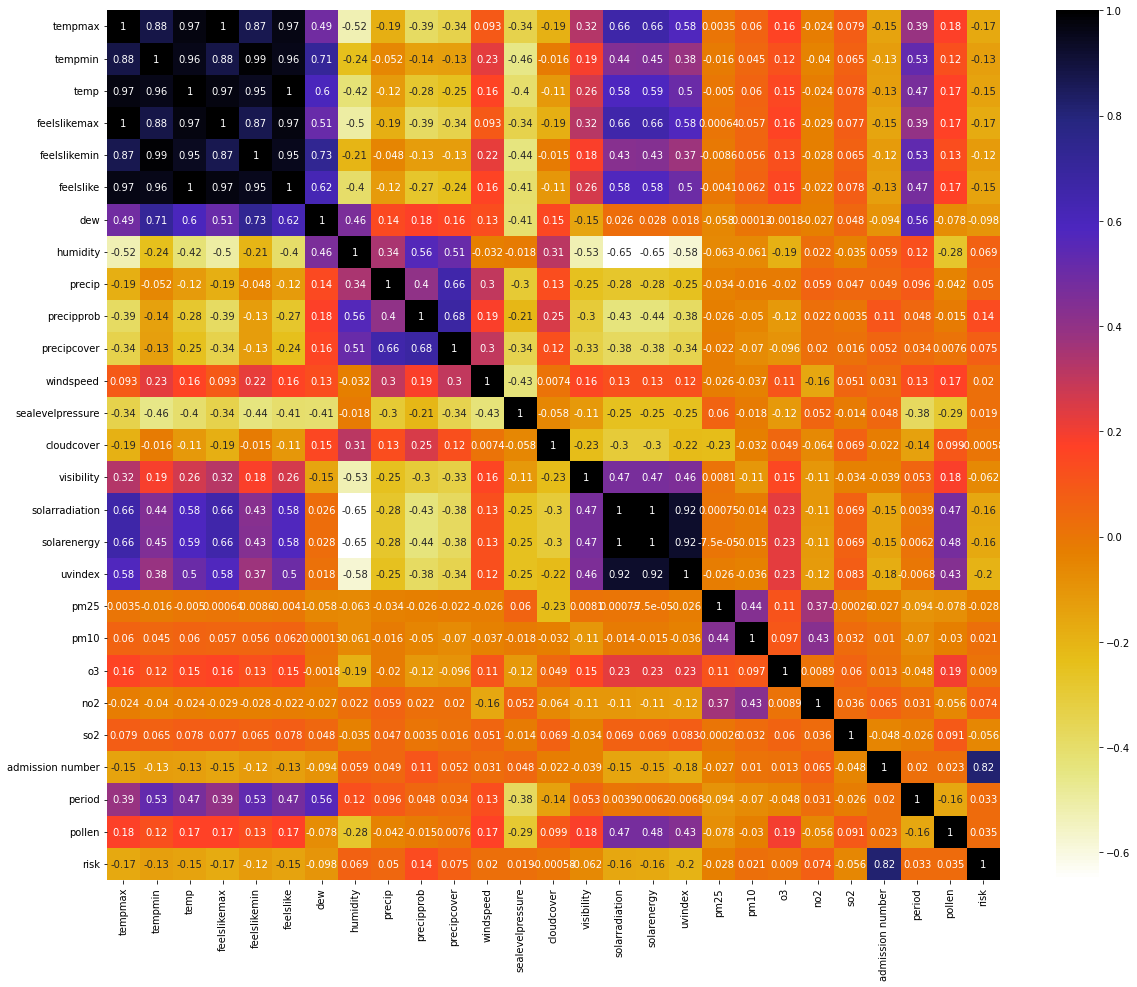

In [48]:
cor = dailydata.corr()
plt.figure(figsize=(20,16))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [49]:
from plotly_calplot import calplot
# creating the plot
fig = calplot(
         dailydata,
         x='datetime',
         y='admission number'
)
fig.show()

In [50]:
from plotly_calplot import calplot
# creating the plot
fig = calplot(
         dailydata,
         x='datetime',
         y='risk'
)
fig.show()

In [51]:
 dailydata['pollen_intensity'].value_counts()

good              565
muito elevados    123
moderados          45
baixos             28
elevados           28
Name: pollen_intensity, dtype: int64

In [ ]:
dailydata

In [46]:
dailydata['pollen'] = [0 if risk=='good' else 1 if risk=='baixos' else 2 if risk=='elevados'
                     else 3 for risk in dailydata['pollen_intensity']]
# creating the plot
fig = calplot(
         dailydata,
         x='datetime',
         y='pollen'
)
fig.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d04424d850>,
 'caps': [<matplotlib.lines.Line2D at 0x1d044267220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d044259a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1d0442677c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d044267a90>],
 'means': []}

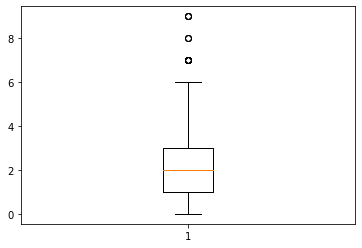

In [69]:
plt.boxplot(dailydata['admission number'])

In [70]:
dailydata['admission number'].describe()

count    789.000000
mean       2.233207
std        1.753564
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: admission number, dtype: float64

In [71]:
# df.pivot_table(index='asma', columns='datetime', aggfunc='count')


In [72]:
df.groupby(['num_sequencial']).size().value_counts()

1     1094
2      176
3       44
4       20
5        7
7        2
17       1
13       1
6        1
11       1
8        1
dtype: int64

In [52]:
df.groupby(['datetime']).size().value_counts()

1    183
2    180
3    133
4     82
5     45
6     24
7      9
9      4
8      3
dtype: int64

In [74]:
# # reshape the data for heatmap; if there's no need to aggregate a function, then use .pivot(...)
# dfp = df.pivot_table(index='datetime', values='asma', aggfunc='count')
# dfp
# # # display(dfp.head())
# # date   2016-08-09  2016-08-11  2016-08-13  2016-08-15  2016-08-17  2016-08-19  2016-08-21  2016-08-23  2016-08-25  2016-09-09
# # depth                                                                                                                        
# # 1.50     0.334661         NaN         NaN    0.302670    0.314186    0.325257    0.313645    0.263135         NaN         NaN
# # 1.75     0.305488    0.303005    0.410124    0.299095    0.313899    0.280732    0.275758    0.260641         NaN    0.318099
# # 2.00     0.322312    0.274105         NaN    0.319606    0.268984    0.368449    0.311517    0.309923         NaN    0.306162
# # 2.25     0.289959    0.315081         NaN    0.302202    0.306286    0.339809    0.292546    0.314225    0.263875         NaN
# # 2.50     0.314227    0.296968         NaN    0.312705    0.333797    0.299556    0.327187    0.326958         NaN         NaN

# # plot
# fig, ax = plt.subplots(figsize=(15,10))
# sns.heatmap(dfp, cmap='GnBu')

In [75]:
df.drop(['data_admissao', 'dicofre', 'distrito', 'concelho', 'freguesia', 'regiao', 'nacionalidade',
         'cod_proveniencia', 'proveniencia', 'cod_causa', 'causa', 'cod_destino', 'destino',
         'diagnostico', 'classe', 'asma', 'date', 'name','snow', 'snowdepth', 'winddir', 'cor',
         'severerisk', 'sunrise', 'sunset', 'stations', 'icon', 'description', 'preciptype',
         'moonphase'],
        axis=1, inplace=True)

In [76]:
df

,num_sequencial,sexo,idade,colorid,pollen_intensity,datetime,tempmax,tempmin,temp,feelslikemax,...,visibility,solarradiation,solarenergy,uvindex,conditions,pm25,pm10,o3,no2,so2
0,372731,1,35,3.0,good,2019-01-01,16.0,7.6,11.5,16.0,...,10.1,117.2,10.3,5,Clear,0.0,19.0,12.0,22.0,1.0
1,945004,1,11,2.0,good,2019-01-01,16.0,7.6,11.5,16.0,...,10.1,117.2,10.3,5,Clear,0.0,19.0,12.0,22.0,1.0
2,1156492,1,5,2.0,good,2019-01-01,16.0,7.6,11.5,16.0,...,10.1,117.2,10.3,5,Clear,0.0,19.0,12.0,22.0,1.0
3,1156493,2,45,2.0,good,2019-01-01,16.0,7.6,11.5,16.0,...,10.1,117.2,10.3,5,Clear,0.0,19.0,12.0,22.0,1.0
4,114619,1,26,4.0,good,2019-01-01,16.0,7.6,11.5,16.0,...,10.1,117.2,10.3,5,Clear,0.0,19.0,12.0,22.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,67757,2,20,4.0,good,2022-02-27,18.5,11.4,14.2,18.5,...,10.5,195.3,17.0,7,NaN,38.0,13.0,34.0,7.0,0.0
1758,839935,1,10,3.0,good,2022-02-28,20.8,9.9,14.4,20.8,...,10.6,178.1,15.4,6,NaN,33.0,14.0,23.0,23.0,0.0
1759,89678,2,39,4.0,good,2022-02-28,20.8,9.9,14.4,20.8,...,10.6,178.1,15.4,6,NaN,33.0,14.0,23.0,23.0,0.0
1760,684683,2,18,4.0,good,2022-02-28,20.8,9.9,14.4,20.8,...,10.6,178.1,15.4,6,NaN,33.0,14.0,23.0,23.0,0.0


<AxesSubplot:>

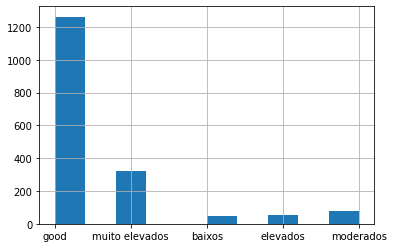

In [77]:
df['pollen_intensity'].hist()

<AxesSubplot:>

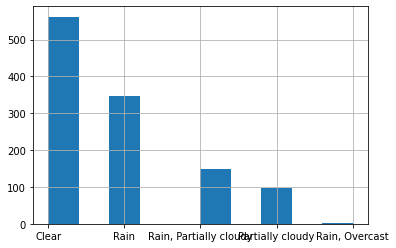

In [78]:
df['conditions'].hist()

array([[<AxesSubplot:title={'center':'humidity'}>]], dtype=object)

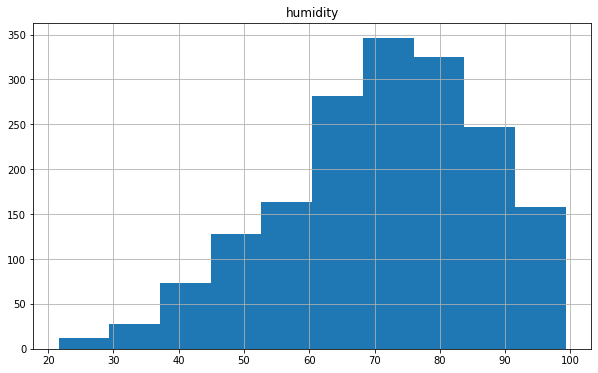

In [79]:
df[['humidity']].hist(figsize=(10,6))

array([[<AxesSubplot:title={'center':'baixos'}>,
        <AxesSubplot:title={'center':'elevados'}>],
       [<AxesSubplot:title={'center':'good'}>,
        <AxesSubplot:title={'center':'moderados'}>],
       [<AxesSubplot:title={'center':'muito elevados'}>, <AxesSubplot:>]],
      dtype=object)

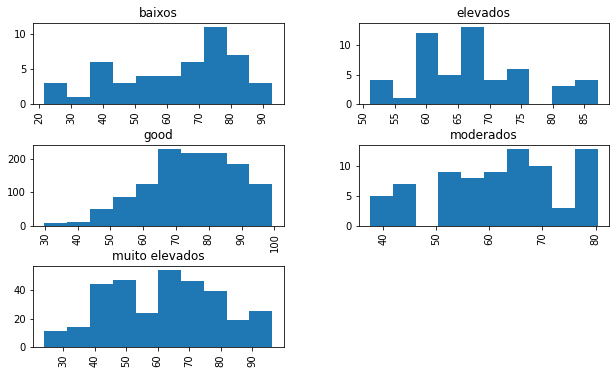

In [80]:
df[['humidity', 'pollen_intensity']].hist(figsize=(10,6), by='pollen_intensity')

array([[<AxesSubplot:title={'center':'Clear'}>,
        <AxesSubplot:title={'center':'Partially cloudy'}>],
       [<AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'Rain, Overcast'}>],
       [<AxesSubplot:title={'center':'Rain, Partially cloudy'}>,
        <AxesSubplot:>]], dtype=object)

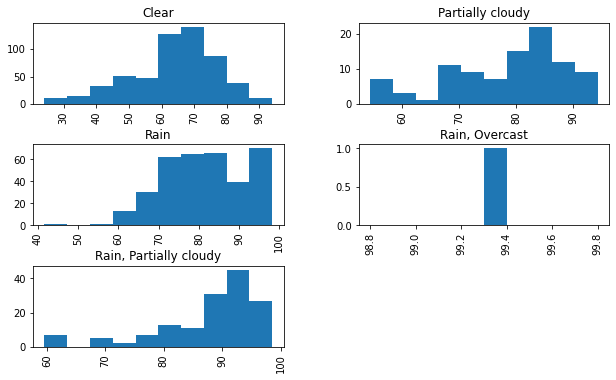

In [81]:
df[['conditions', 'humidity']].hist(figsize=(10,6), by='conditions')

array([[<AxesSubplot:title={'center':'baixos'}>,
        <AxesSubplot:title={'center':'elevados'}>],
       [<AxesSubplot:title={'center':'good'}>,
        <AxesSubplot:title={'center':'moderados'}>],
       [<AxesSubplot:title={'center':'muito elevados'}>, <AxesSubplot:>]],
      dtype=object)

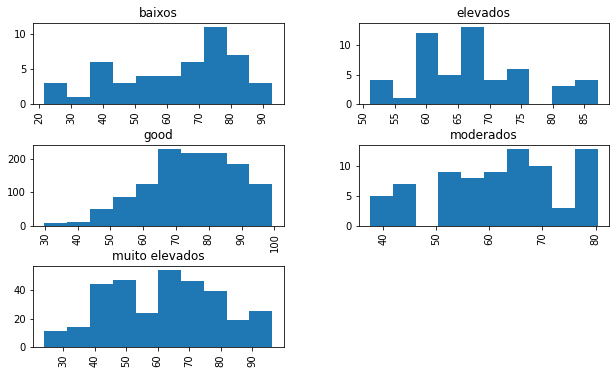

In [82]:
df[['humidity', 'pollen_intensity']].hist(figsize=(10,6), by='pollen_intensity')

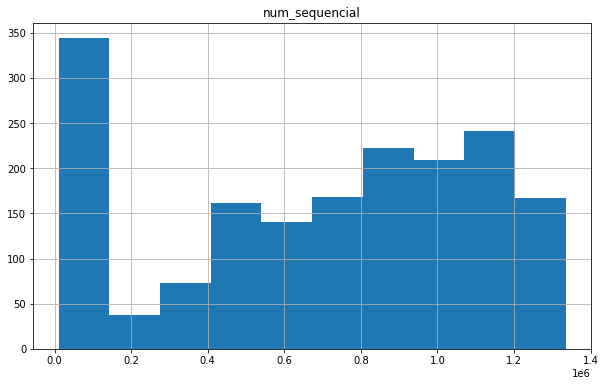

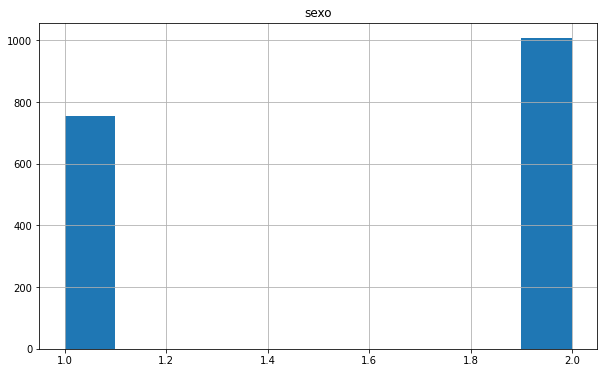

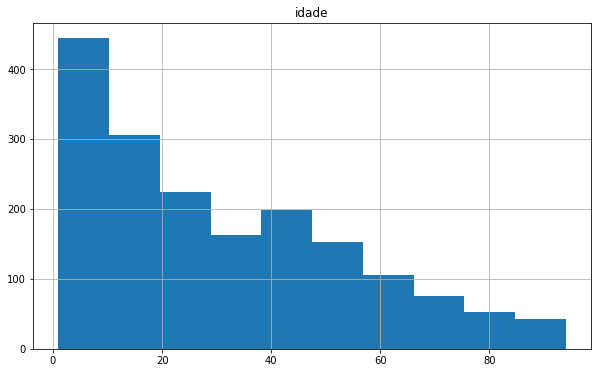

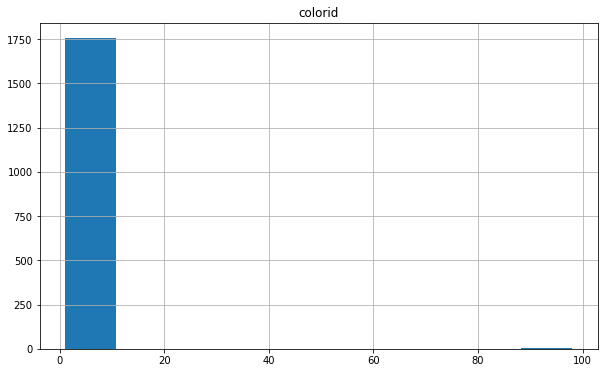

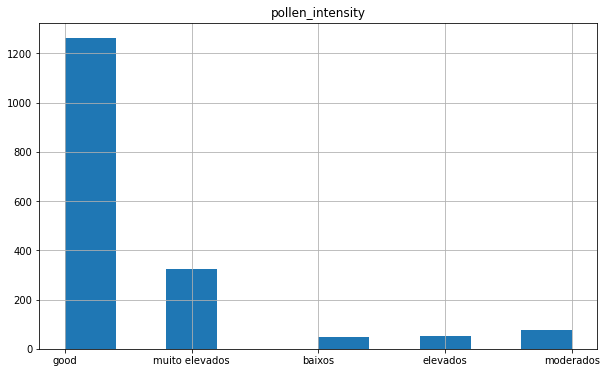

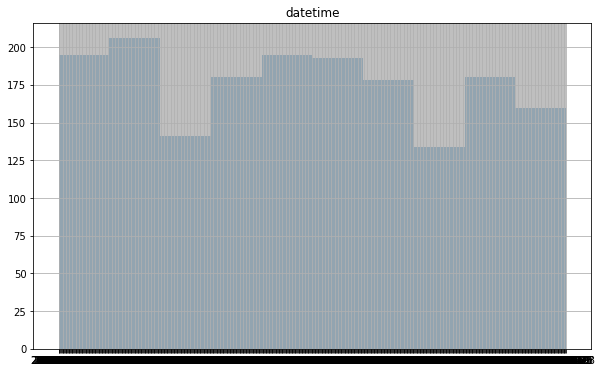

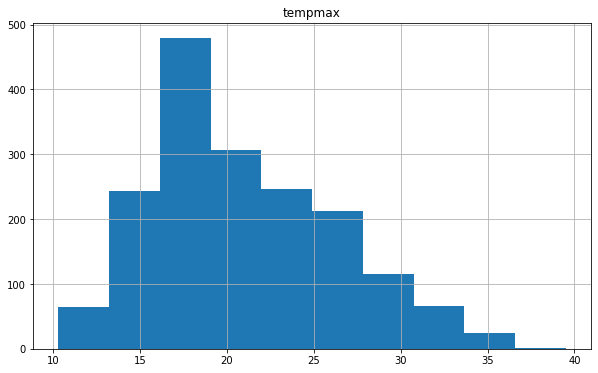

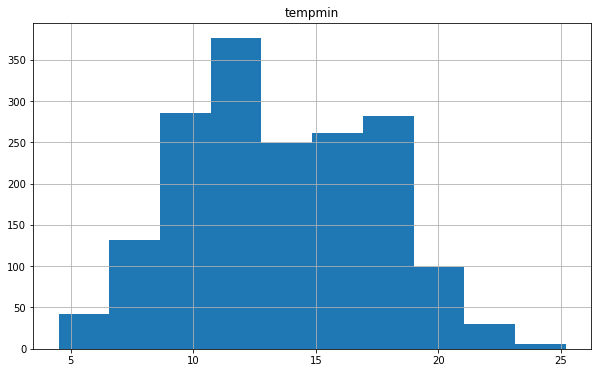

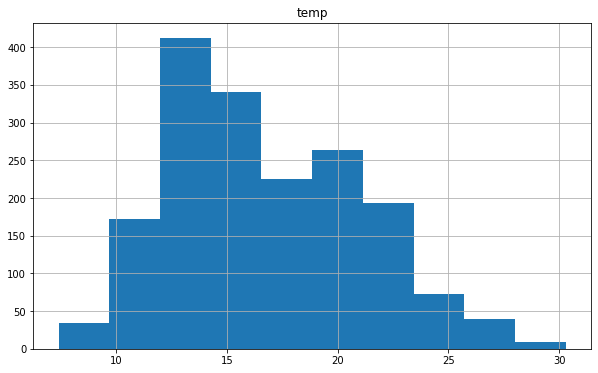

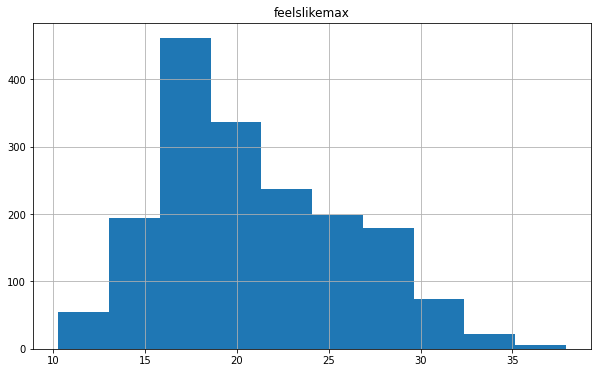

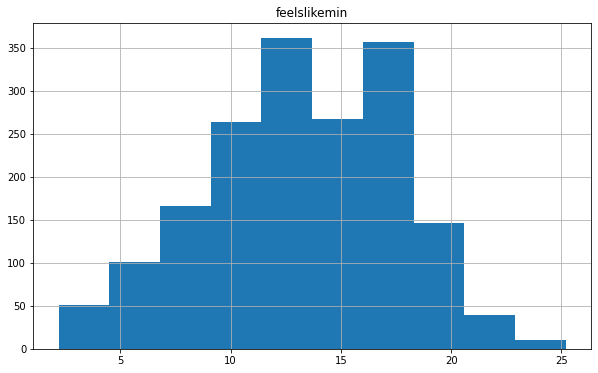

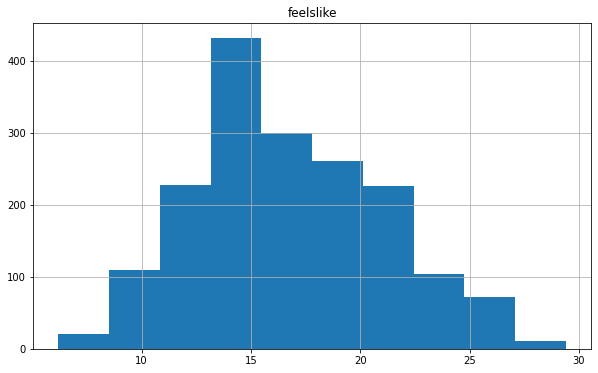

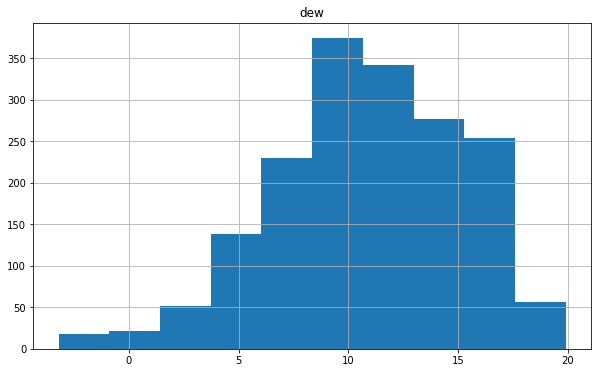

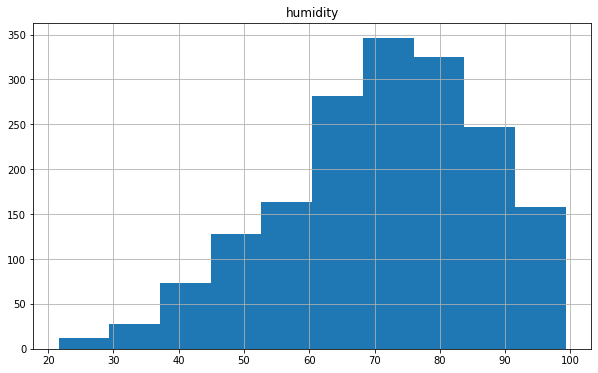

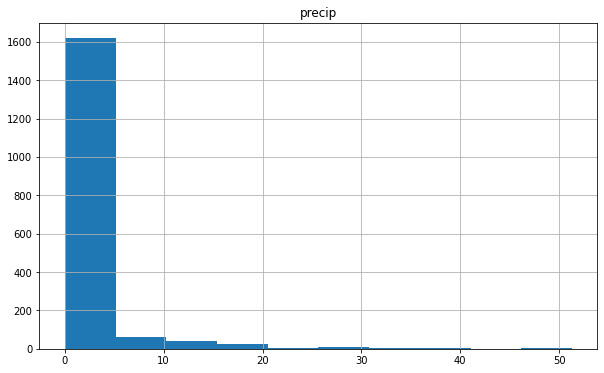

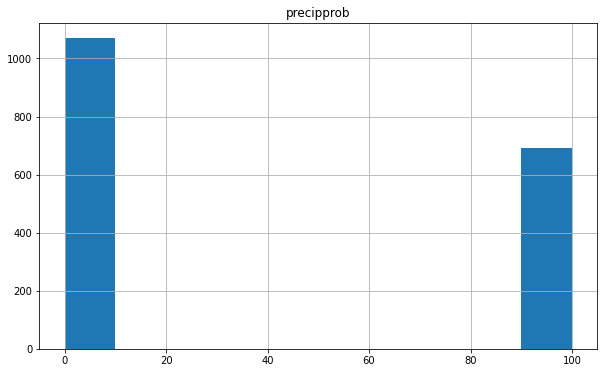

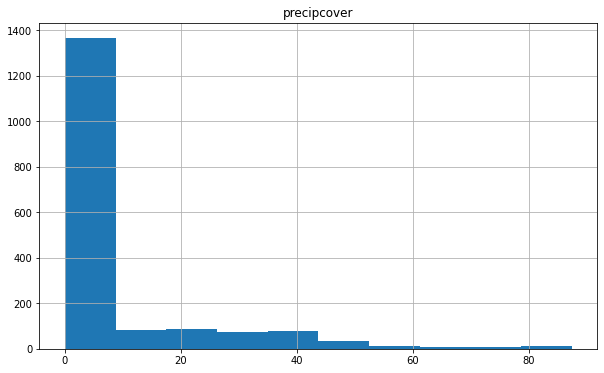

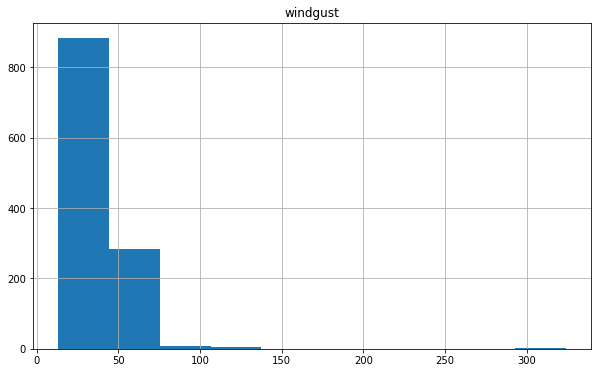

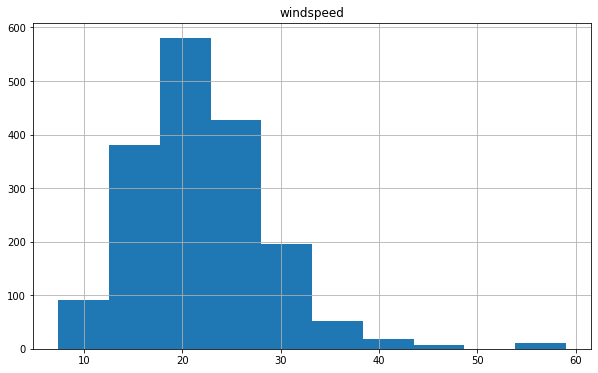

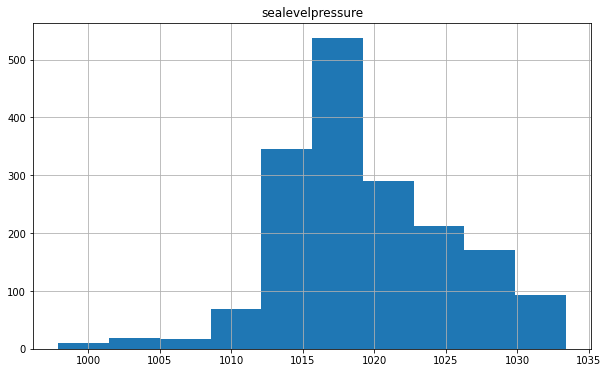

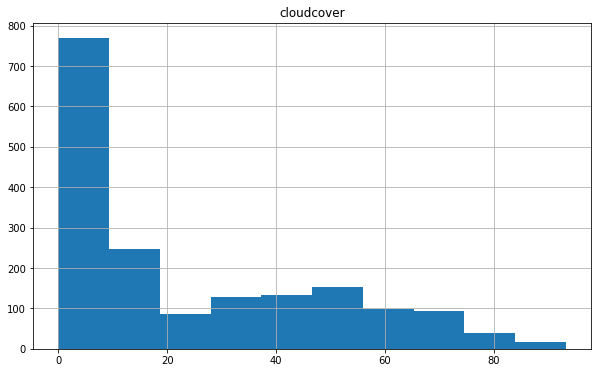

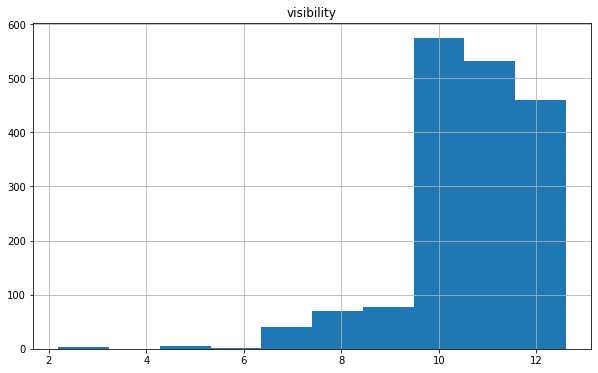

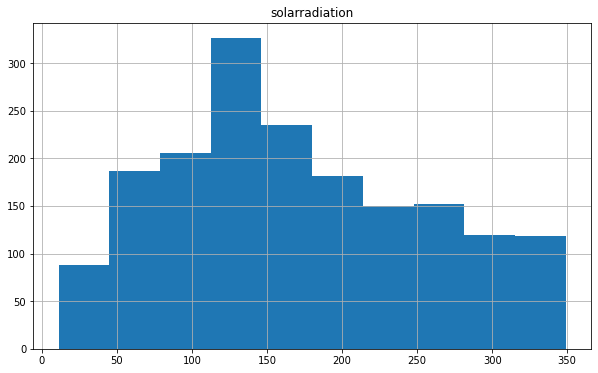

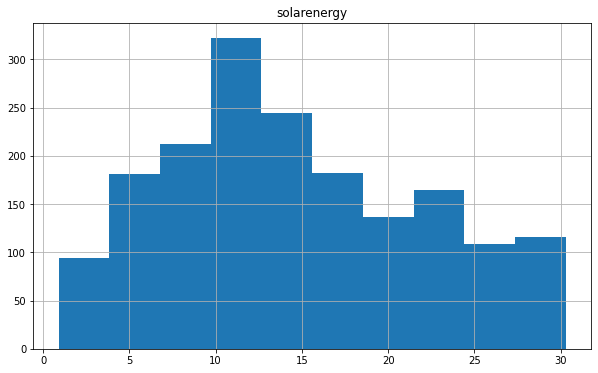

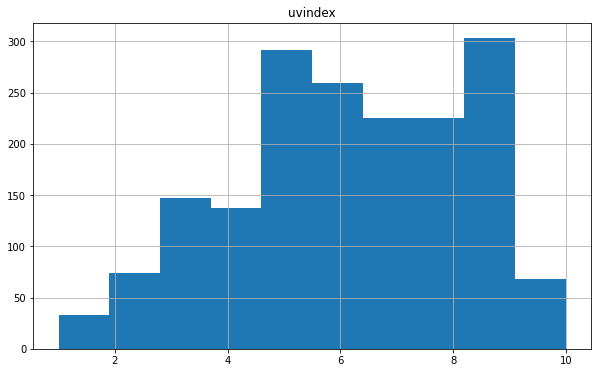

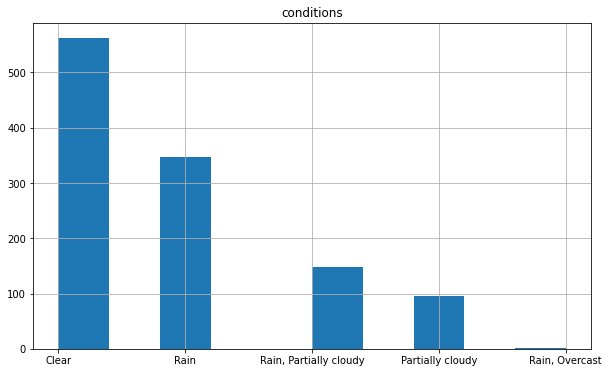

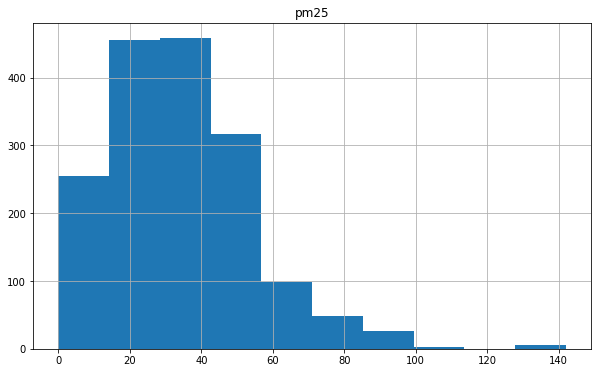

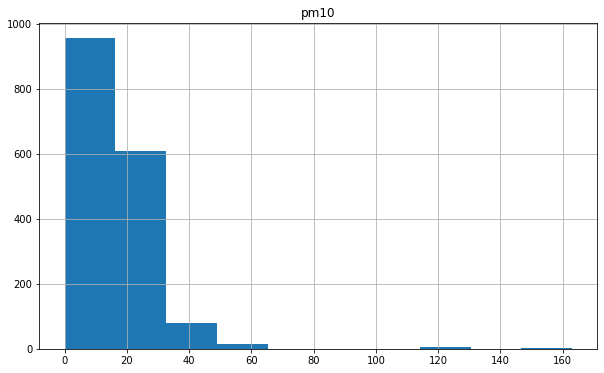

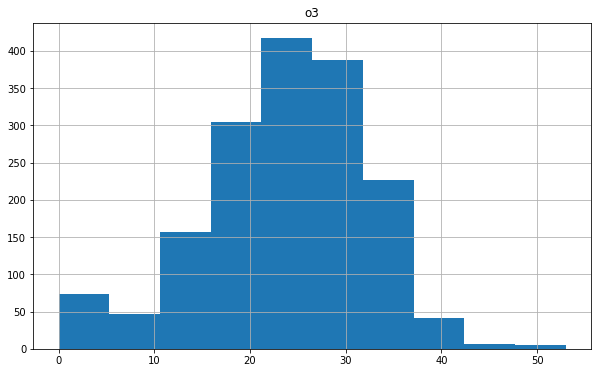

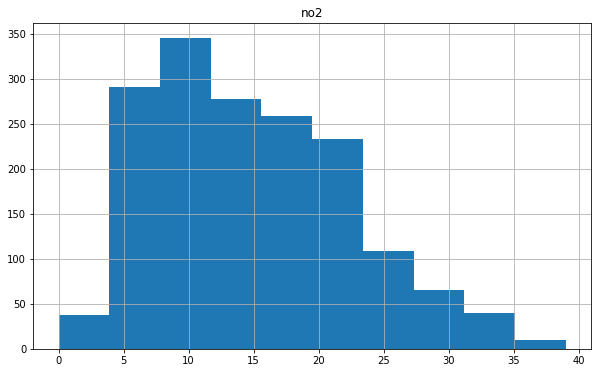

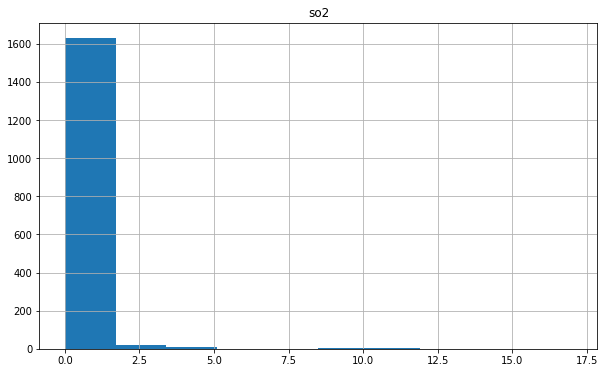

In [83]:
for col in df:
    df[col].hist(figsize=(10,6))
    plt.title(col)
    plt.show()


In [84]:
weather = pd.read_excel('Lisbon,Portugal 2019-01-01 to 2022-11-29.xlsx')

array([[<AxesSubplot:title={'center':'tempmax'}>,
        <AxesSubplot:title={'center':'tempmin'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'feelslikemax'}>,
        <AxesSubplot:title={'center':'feelslikemin'}>],
       [<AxesSubplot:title={'center':'feelslike'}>,
        <AxesSubplot:title={'center':'dew'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'precip'}>,
        <AxesSubplot:title={'center':'precipprob'}>],
       [<AxesSubplot:title={'center':'precipcover'}>,
        <AxesSubplot:title={'center':'snow'}>,
        <AxesSubplot:title={'center':'snowdepth'}>,
        <AxesSubplot:title={'center':'windgust'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'winddir'}>,
        <AxesSubplot:title={'center':'sealevelpressure'}>,
        <AxesSubplot:title={'center':'cloudcover'}>,
        <AxesSubplot:title={'center':'visibility'}>,
        <AxesSubpl

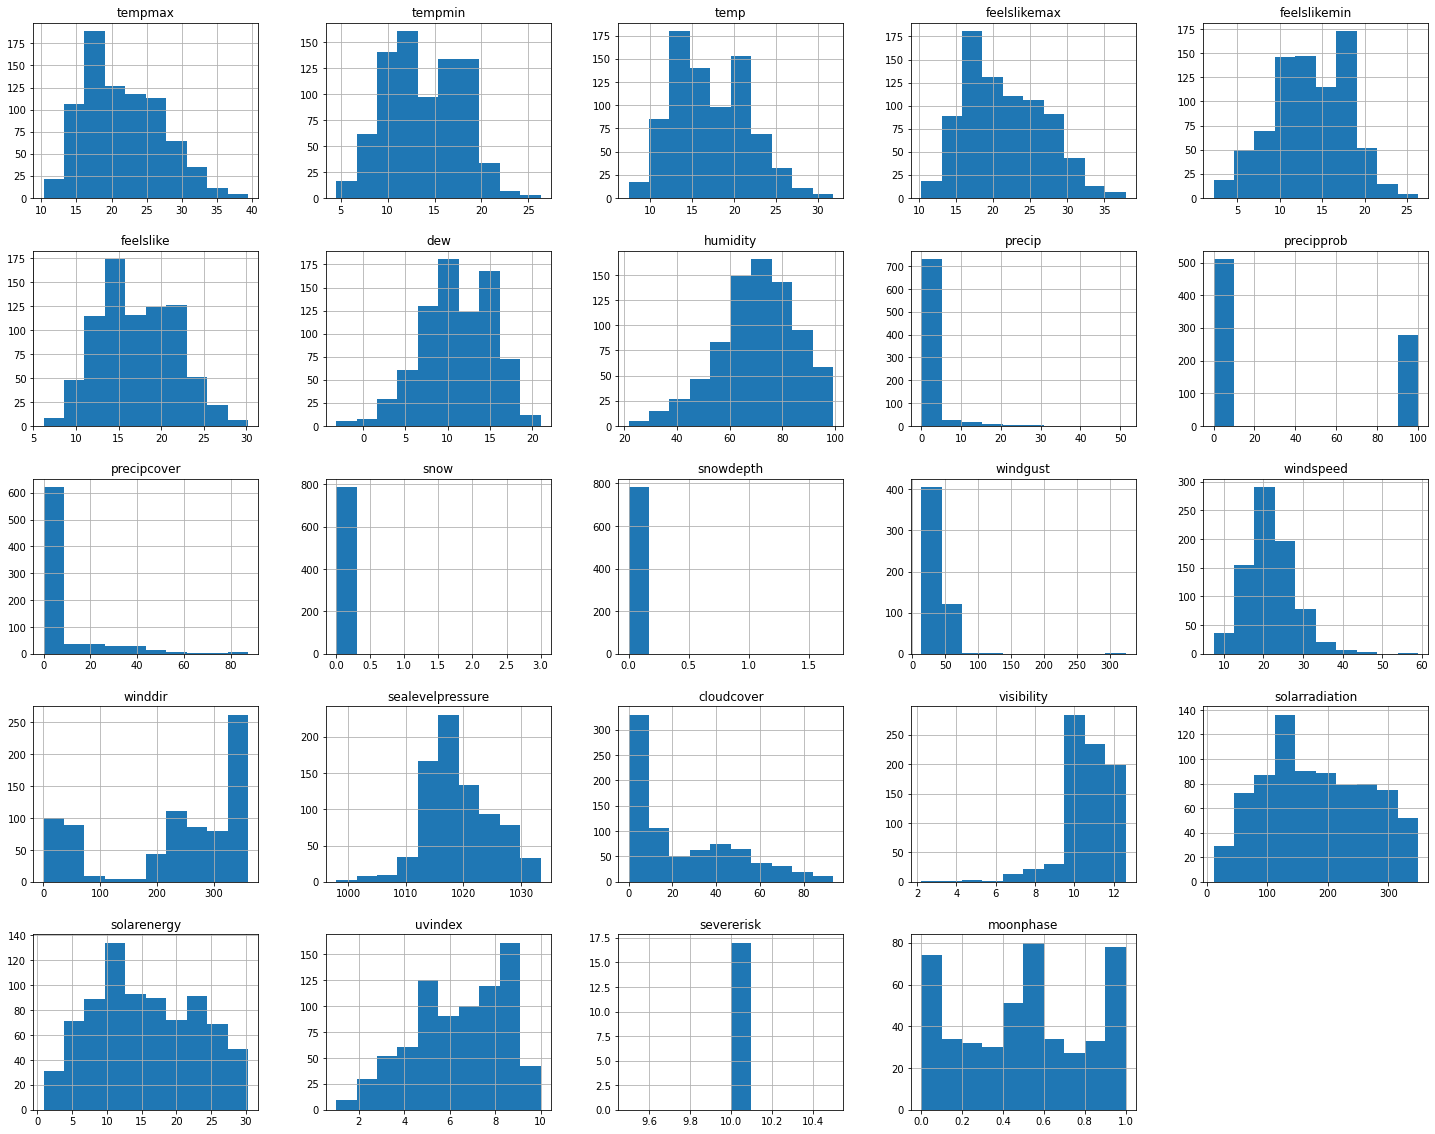

In [85]:
weather.hist(figsize=(25,20))

In [86]:
# tempAmplitude

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'tempmax'}>,
        <AxesSubplot:title={'center':'tempmin'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'feelslikemax'}>],
       [<AxesSubplot:title={'center':'feelslikemin'}>,
        <AxesSubplot:title={'center':'feelslike'}>,
        <AxesSubplot:title={'center':'dew'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'precip'}>],
       [<AxesSubplot:title={'center':'precipprob'}>,
        <AxesSubplot:title={'center':'precipcover'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'sealevelpressure'}>,
        <AxesSubplot:title={'center':'cloudcover'}>],
       [<AxesSubplot:title={'center':'visibility'}>,
        <AxesSubplot:title={'center':'solarradiation'}>,
        <AxesSubplot:title={'center':'solarenergy'}>,
        <AxesSubplot:title={'center':'uvindex'}>,
      

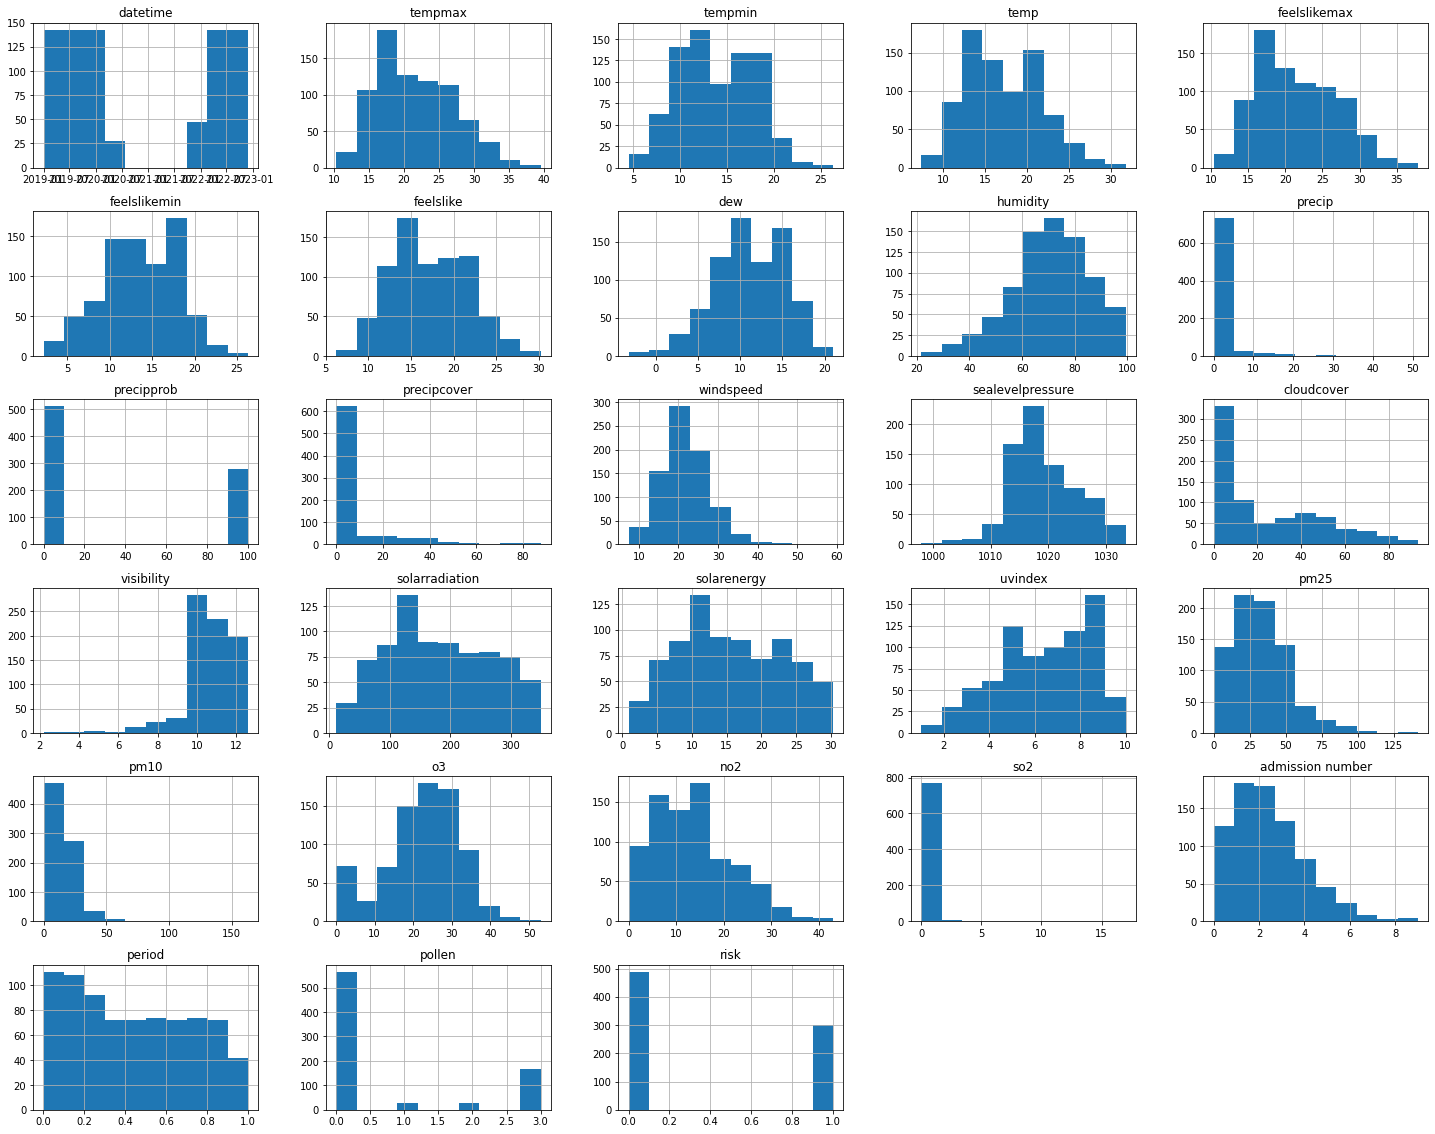

In [53]:
dailydata.hist(figsize=(25,20))